### 영화 정보

In [1]:
import pandas as pd

#영화 정보 로딩(movieID와 제목만 사용)
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('data/ml-10M100K/movies.dat', names = m_cols,
                    sep = '::', encoding='latin-1', engine='python')

In [2]:
# 장르의 종류 개수
movie_genre =[]
for genres in movies['genre']:
    movie_genre.append(genres.split('|'))

genres = [genre for movie in movie_genre for genre in movie]
print(set(genres), len(set(genres)))

{'Children', 'Documentary', 'Romance', 'Animation', 'Action', 'Comedy', 'IMAX', 'Thriller', 'Horror', '(no genres listed)', 'Mystery', 'Adventure', 'Fantasy', 'Western', 'Drama', 'Musical', 'Sci-Fi', 'Crime', 'War', 'Film-Noir'} 20


In [3]:
# genre를 list 형식으로
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


### 태그 정보

In [4]:
# 사용자가 부여한 영화의 태그 정보 로딩
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('data/ml-10M100K/tags.dat',names = t_cols,
                                 sep = '::', engine='python')

user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
print(f'태그 종류={len(user_tagged_movies.tag.unique())}')
print(f'태그 레코드 수={len(user_tagged_movies)}')
print(f'태그가 붙어 있는 영화 수={len(user_tagged_movies.movie_id.unique())}')

태그 종류=15241
태그 레코드 수=95580
태그가 붙어 있는 영화 수=7601


In [6]:
# tag를 영화별로 list 형식으로 저장\
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# 태그 정보를 결합한다
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


### 평가값 데이터

In [7]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/ml-10M100K/ratings.dat',names = r_cols,
                     sep = '::', engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [8]:
# 데이터양이 많으므로 사용자 수를 줄여서 실험
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]

# 영화 데이터와 평가 데이터를 결합
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."


In [9]:
import numpy as np
movielens.groupby('user_id').agg({'movie_id': len}).agg({
    'movie_id' :[min, max, np.mean, len]
})

C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\769309350.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({
C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\769309350.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({
C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\769309350.py:2: FutureWarning: The provided callable <function mean at 0x00000221BF18B100> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" ins

,movie_id
min,20.00
max,1668.00
mean,132.83
len,1000.00


In [10]:
movielens.groupby('movie_id').agg({'user_id': len}).agg({
    'user_id' :[min, max, np.mean, len]
})

C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\3776583707.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({
C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\3776583707.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({
C:\Users\jungs\AppData\Local\Temp\ipykernel_23648\3776583707.py:1: FutureWarning: The provided callable <function mean at 0x00000221BF18B100> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" 

,user_id
min,1.000000
max,496.000000
mean,19.719418
len,6736.000000


In [11]:
print(f'평갓값 수={len(movielens)}')
movielens.groupby('rating').agg({'movie_id':len})

평갓값 수=132830


,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


C:\Users\jungs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


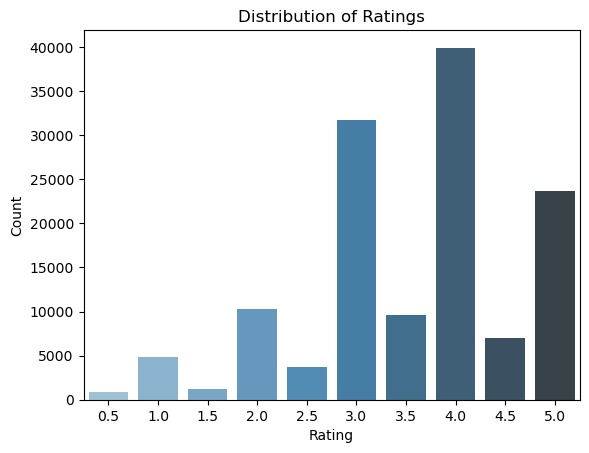

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


ratings = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
counts = [851, 4847, 1247, 10292, 3729, 31706, 9661, 39917, 6949, 23631]

sns.barplot(x=ratings, y=counts, palette="Blues_d")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## 평가 방법

In [13]:
# 학습용과 테스트용으로 데이터 분할
# 각 사용자가 가장 최근에 평가한 5건의 영화를 평가용으로 사용하고 그 외에는 학습용으로
# 먼저 각 사용자가 평가한 영화의 순서를 계산
# 직전에 평가한 영화부터 순서를 부여해 나간다

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movie_train = movielens[movielens['timestamp_rank']>5]
movie_test = movielens[movielens['timestamp_rank']<=5]

In [14]:
from typing import List, Dict
from sklearn.metrics import mean_squared_error
def calc_rmse(self, true_rating: List[float], pred_raing: List[float]) -> float:
    return np.sqrt(mean_squared_error(true_rating, pred_traing))

In [15]:
# recall@k
def calc_recall_at_k(true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int) -> float:
    scores = []
    # 테스트 데이터에 존재하는 각 사용자의 recall@k를 계산
    for user_id in true_user2items.key():
        r_at_k = _recall_at_k(true_user2items[user_id],
                              pred_user2items[user_id], k)
        scores.append(r_at_k)
    return np.mean(scores)

def _recall_at_k(self, true_user2items: List[int], pred_user2items: List[int], k: int) -> float:
    if len(true_items) == 0 or k == 0:
        return 0.0
    
    r_at_k = (len(set(true_items) & set(pred_items[:k]))) / len(true_items)
    return r_at_k


# precision@k
def calc_precision_at_k(true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int) -> float:
    scores = []
    # 테스트 데이터에 존재하는 각 사용자의 precsion@k를 계산
    for user_id in true_user2items.key():
        p_at_k = _precsion_at_k(true_user2items[user_id],
                              pred_user2items[user_id], k)
        scores.append(p_at_k)
    return np.mean(scores)

def _precision_at_k(self, true_user2items: List[int], pred_user2items: List[int], k: int) -> float:
    if k == 0:
        return 0.0
    
    p_at_k = (len(set(true_items) & set(pred_items[:k]))) / k
    return p_at_k

# 통일된 포맷을 위한 설계

In [16]:
# from util.data_loader import DataLoader
# from util.metric_calculator import MetricCalculator

# # 1. 데이터 로딩
# data_loader = DataLoader(num_users=1000, num_test_items=5,
#                          data_path='data/ml-10M100K/')
# movielens = data_loader.load()

# # 2. 각종 알고리즘 구현
# recommender = XXXRecommender()
# recommend_result = recommender.recommend(movielens)

# # 3. 평가 지표 계산
# metric_calculator = MetricCalculator()
# metrics = metric_calculator.calc(
#         movielens.test.rating.tolist(), recommend_result.rating.tolist(),
#         mobielens.test_user2items, recommend_result.user2items, k = 10)
# print(metrics)

## 1. MovieLens 데이터 로딩

In [17]:
import pandas as pd
import os
from util.models import Dataset

class DataLoader:
    def __init__(self, num_users: int = 1000, num_test_items: int = 5, data_path: str= '/data/ml-10M100K/'):
        self.num_users = num_users
        self.num_test_items = num_test_items
        self.data_path = data_path
        
    def load(self) -> Dataset:
        ratings, movie_content = self._load()
        movielens_train, movielens_test = self._split_data(ratings)
        # 순위용 평가 데이터는 각 사용자의 평갓값이 4 이상인 영화를 정답
        # 키는 사용자 ID, 값은 사용자가 고평가한 ID 리스트
        movielens_test_user2items = (
            movielens_test[movielens_test.rating >= 4].groupby("user_id").agg({'movie_id': list})['movie_id'].to_dict()
        )
        return Dataset(movielens_train, movielens_test,
                       movielens_test_user2items, movie_content)
    
    def _split_data(self, movielens: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
        # 학습용과 테스트용 데이터를 분할
        # 각 사용자가 가장 최근에 평가한 5건을 평가용으로 사용하고 그 외는 학습용으로 사용
        # 먼저 각 사용자가 평가한 영화의 순서를 계산
        # 직전에 평가한 영화부터 순서 부여(0부터 시작)
        movielens['rating_order'] = movielens.groupby('user_id')['timestamp'].rank(ascending=False, method = "first")
        movielens_train = movielens[movielens['rating_order'] > self.num_test_items]
        movielens_test = movielens[movielens['rating_order'] <= self.num_test_items]
        return movielens_train, movielens_test
    
    def _load(self) -> (pd.DataFrame, pd.DataFrame):
        
        ### 영화 정보 로딩
        # movie_id와 제목만 사용
        m_cols = ['movie_id', 'title', 'genre']
        movies = pd.read_csv(
            os.path.join(self.data_path, 'movie,dat'), names=m_cols,
            sep='::', encoding='latin-1', engine='python')
        # genre를 list형식으로 저장
        movies['genre'] = movies.genre.apply(lambda x:list(x.split("|")))
        
        
        ### 영화 태그 정보 로딩
        t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
        user_tagged_movies =pd.read_csv(
            os.path.join(self.data_path, 'tag,dat'), names=t_cols,
            sep='::', engine='python')
        # tag를 소문자로
        user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()
        movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})
        # 태그 정보를 결합
        movies = movies.merge(movie_tags, on='movie_id', how='left')
        
        
        ### 평가 데이터 로딩
        r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
        ratings =  pd.read_csv(
            os.path.join(self.data_path, 'ratings,dat'), names=r_cols,
            sep='::', engine='python')
        # 위의 데이터를 결합
        movielens_ratings = ratings.merge(movies, on='movie_id')
        return movielens_ratings, movies

In [18]:
import dataclasses
@dataclasses.dataclass(frozen=True)
# 추천 시스템 학습과 평가에 사용하는 데이터셋
class Dataset:
    # 학습용 평갓값 데이터셋
    train: pd.DataFrame
    # 테스트용 평갓값 데이터셋
    test: pd.DataFrame
    # 순위 지표 테스트 데이터셋
    # 키는 사용자 ID, 값은 사용자가 높게 평가한 아이템 ID 리스트
    test_user2items: Dict[int, List[int]]
    # 아이템 콘텐츠 정보
    item_content: pd.DataFrame

## 2. 각종 알고리즘 구현

In [19]:
dataclasses.dataclass(frozen=True)
#추천 시스템의 예측 결과
class RecommendResult:
    # 테스트 데이터셋의 예측 평갓값: RMSE 평가
    rating: pd.DataFrame
    # 키는 사용자 ID, 값은 추천 아이템 ID 리스트, 순위 지표 평가
    test_user2items: Dict[int, List[int]]

In [20]:
from abc import ABC, abstractmethod
class BaseRecommender(ABC):
    @abstractmethod
    def recommend(self, dataset: Dataset, **kwargs) -> RecommendResult:
        pass
    
    def run_sample(self) -> None:
        # MovieLens의 데이터 취득
        movielens = DataLoader(num_users=1000, num_test_items=5,
                               data_path='data/ml-10M100K/').load()
        # 추천 계산
        recommend_result = self.recommend(movielens)
        # 추천 결과 평가
        metrics = MetricCalculator().calc(
        movielens.test.rating.tolist(),
        movielens.test_user2items,
        recommend_result.user2items,
        k=10)
        print(metrics)

## 3. 평가 지표 계산

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
from util.models import Metrics
from typing import Dict, List

class MetricCalculator:
    def calc(
        self,
        true_rating: List[float],
        pred_traint: List[float],
        true_user2items: Dict[int, List[int]],
        pred_user2items: Dict[int, List[int]],
        k: int
    ) -> Metrics: 
        
        rmse = self._calc_rmse(true_rating, pred_rating)
        precision_at_k = self.calc_precision_at_k(true_user2items, pred_user2items, k)
        recall_at_k = self._calc_recall_at_k(true_user2items, pred_user2items, k)
        return Metrics(rmse, precision_at_k, recall_at_k)
    
    # precision
    def _precision_at_k(self, true_items: List[int], pred_items: List[int], k: int) -> float:
        if k == 0:
            return 0.0
    
        p_at_k = (len(set(true_items) & set(pred_items[:k]))) / k
        return p_at_k
    
    #recall
    def _recall_at_k(self, true_items: List[int], pred_items: List[int], k: int) -> float:
        if len(true_items) == 0 or k == 0:
            return 0.0
    
        r_at_k = (len(set(true_items) & set(pred_items[:k]))) / len(true_items)
        return r_at_k

    def _calc_rmse(self, true_rating: List[float], pred_raing: List[float]) -> float:
        return np.sqrt(mean_squared_error(true_rating, pred_traing))

    # recall@k
    def calc_recall_at_k(true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int) -> float:
        scores = []
        # 테스트 데이터에 존재하는 각 사용자의 recall@k를 계산
        for user_id in true_user2items.key():
            r_at_k = _recall_at_k(true_user2items[user_id],
                                  pred_user2items[user_id], k)
            scores.append(r_at_k)
        return np.mean(scores)
    
    # precision@k
    def calc_precision_at_k(true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int) -> float:
        scores = []
        # 테스트 데이터에 존재하는 각 사용자의 precsion@k를 계산
        for user_id in true_user2items.key():
            p_at_k = _precsion_at_k(true_user2items[user_id],
                                  pred_user2items[user_id], k)
            scores.append(p_at_k)
        return np.mean(scores)